In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import graphviz
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, make_scorer, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

%run utility_functions.py # functions reused throughout

-1    4849
 1    1001
Name: cleave, dtype: int64

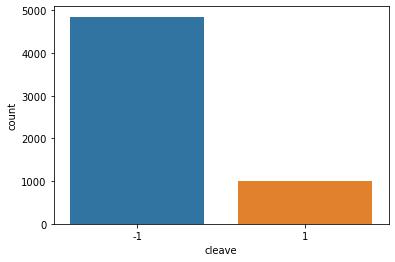

In [2]:
# Dataset source:
#http://archive.ics.uci.edu/ml/datasets/HIV-1+protease+cleavage#
# combined all datasets, removing duplicates

# Read in data
data = pd.read_csv('../data/HIV_DataSet.csv', sep=',')

sns.countplot(data['cleave']) # plot number of things with each value
# number of negative cleave values versus positive.
data['cleave'].value_counts(sort=True)
# skewed toward predicting negative because more examples?

In [3]:
# Create training, testing, and validation sets

X = data.drop('cleave', axis=1) # last value is the cleavage
y = data['cleave']


x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2) # 80/20 default

# scale so it converges
scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train)
x_train = scaling.transform(x_train)
x_test = scaling.transform(x_test)


In [7]:

clf = svm.SVC(random_state=0)


parameters = {'kernel': ['linear', 'rbf'],
              'gamma': ['scale', 'auto'],
              'C': [1, 10, 100],
              'shrinking': [True, False],
              'break_ties': [True, False],
              'tol': [1e-3, 1e-4],
              'max_iter': [1000, 10000, 100000],
              'probability': [True]
             }


# scorer for parameter combinations
acc_scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer, cv=5, n_jobs=4)
grid_obj = grid_obj.fit(x_train, y_train)

# Set clf to best combination of parameters
clf = grid_obj.best_estimator_

In [8]:
# train model
clf.fit(x_train, y_train)

SVC(C=10, break_ties=True, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=10000, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

No Skill: ROC AUC=0.500
Model: ROC AUC=0.750


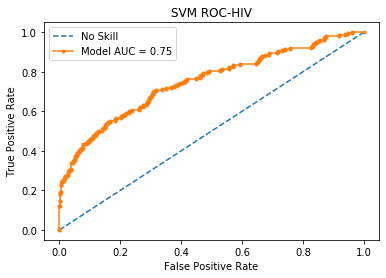

Model: f1=0.393 auc=0.527


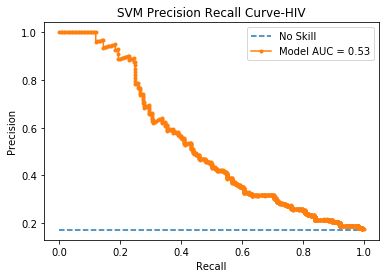

Classification Report
              precision    recall  f1-score   support

          -1       0.87      0.98      0.92       969
           1       0.77      0.26      0.39       201

    accuracy                           0.86      1170
   macro avg       0.82      0.62      0.66      1170
weighted avg       0.85      0.86      0.83      1170

Confusion Matrix
[[953  16]
 [148  53]]
Accuracy
0.8598290598290599
Balanced Accuracy
0.6235848620673721


<module 'matplotlib.pyplot' from 'c:\\users\\spcbe\\miniconda3\\envs\\ml_env\\lib\\site-packages\\matplotlib\\pyplot.py'>

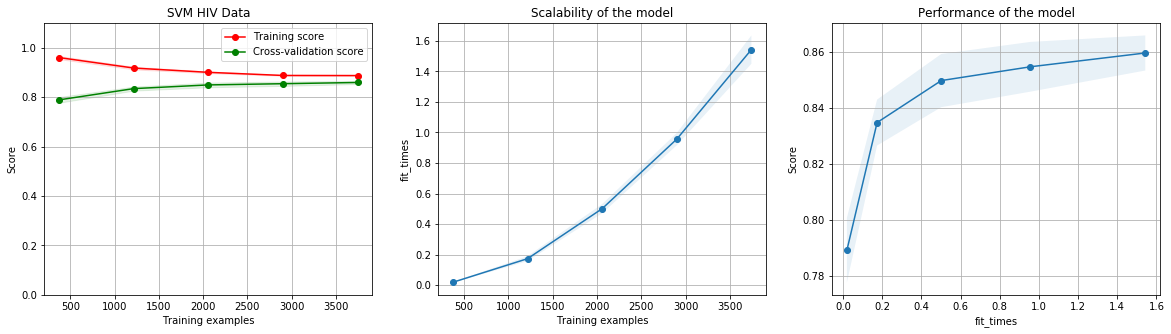

In [9]:

# filter warnings
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# test
y_predict = clf.predict(x_test)

# ROC
plot_roc(clf, x_test, y_test, y_predict, 'SVM ROC-HIV')
# Recall_precision_curve
plot_precision_recall_curve(clf, x_test, y_test, y_predict, 'SVM Precision Recall Curve-HIV')

# how did we do? Comparing y_test and predicted values
print('Classification Report')
print(classification_report(y_test, y_predict,zero_division=1))
print('Confusion Matrix')
# how to interpret: https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28
print(confusion_matrix(y_test, y_predict))
print('Accuracy')
print(accuracy_score(y_test, y_predict))

# for unbalanced data
print('Balanced Accuracy')
print(balanced_accuracy_score(y_test, y_predict))

# 1.1 so I can see the top of the plot
plot_learning_curve(clf, "SVM HIV Data", x_train, y_train, ylim=[0,1.1])


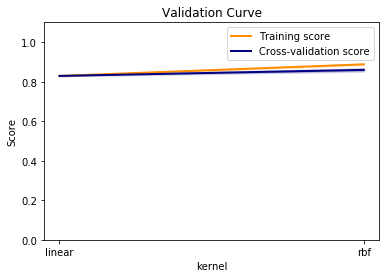

In [10]:
plot_model_complexity_analysis(clf, 'kernel', ['linear', 'rbf'], 'SVM_HIV', x_train, y_train)

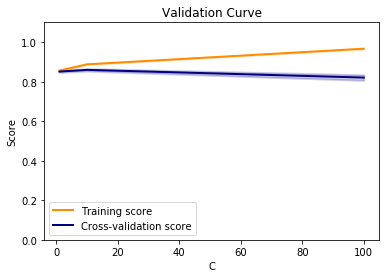

In [11]:
plot_model_complexity_analysis(clf, 'C', [1, 10, 100], 'SVM_HIV', x_train, y_train)

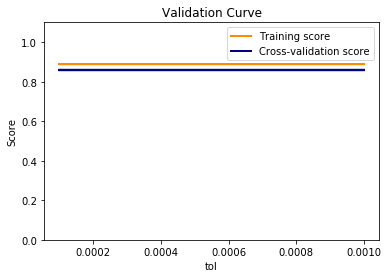

In [12]:
plot_model_complexity_analysis(clf, 'tol', [1e-3, 1e-4],'SVM_HIV', x_train, y_train)

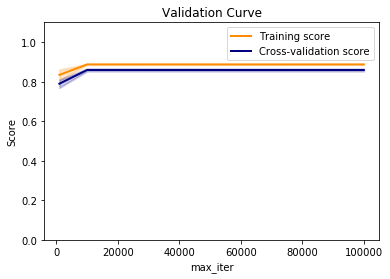

In [13]:

plot_model_complexity_analysis(clf, 'max_iter', [1000, 10000, 100000],'SVM_HIV', x_train, y_train)